### Feature example
This notebook illustrates how the feature matrices are generated from a binary array (where 1s correspond to vegetated/permeable cells and 0s correspond to bare/impermeable cells).


In [92]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

import gzip
import shutil, os, sys
import pandas as pd
import json


%matplotlib inline

In [93]:
current_dir = os.getcwd()
for mod in ['plot_functions', 'feature_functions']:
    if mod in sys.modules: 
        del sys.modules[mod]

from feature_functions import *   
from plot_functions import *


In [94]:
# Print some details about the simulation notebook
example_name = "example_image" # should correspond to one of the example subdirectories
# example_name = "example_rain" 
example_dir = "/".join([current_dir,example_name])
fname = "/".join([example_name,'params.json'])
params = json.load(open(fname))


In [95]:
# Load SVE-R simulation
sim_file = '/'.join([example_dir,  'sim.pklz' ]) 
f = gzip.open(sim_file,'rb')
sim = pickle.load(f) 
f.close()  
sim = pd.Series(sim)

In [126]:
# specify parameters to generate the features
rvl_params = {'edge': 1, 'saturate' : 50,  'gsigma' : [0, 2]} 
# dictionary of feature arrays 
pattern_dict = RF_patterns(sim.isvegc, rvl_params)

pattern_dict['d2divide'] = sim['d2divide']
# get list of features from pattern_dict
feature_keys =  pattern_dict.keys() 
# lists of vegetated and bare cell features
veg_feat = [feat for feat in feature_keys if 'B' in feat] + ['d2divide']
bare_feat = [feat for feat in feature_keys if 'V' in feat] + ['d2divide']

In [127]:
# get feature maxtrix with associated target variable (infiltration depth "zinflc")
# columns in pattern_ravel are "raveled" versions of pattern_dict entries
pattern_ravel = get_feature_matrix(sim,rvl_params,'zinflc')
pattern_ravel.head()

,bareLV,bareLV_s2,d2dB,d2dB_s2,d2dV,d2dV_s2,d2divide,d2uB,d2uB_s2,d2uV,d2uV_s2,d2xB,d2xB_s2,d2xV,d2xV_s2,fV,isvegc,patchLB,patchLB_s2,zinflc
0,0.0,0,2,3,0,0,39.5,9,9,0,0,2,3,0,0,0.70125,1.0,3.0,3,0.428406
1,0.0,0,3,3,0,0,38.5,8,8,0,0,2,3,0,0,0.70125,1.0,3.0,3,0.449244
2,0.0,0,4,4,0,0,37.5,7,8,0,0,2,3,0,0,0.70125,1.0,3.0,3,0.498058
3,0.0,0,5,5,0,0,36.5,6,7,0,0,2,3,0,0,0.70125,1.0,3.0,3,0.554747
4,0.0,0,6,5,0,0,35.5,5,6,0,0,2,3,0,0,0.70125,1.0,3.0,3,0.613867


Text(0.5,1,'Length of upslope vegetated patch')

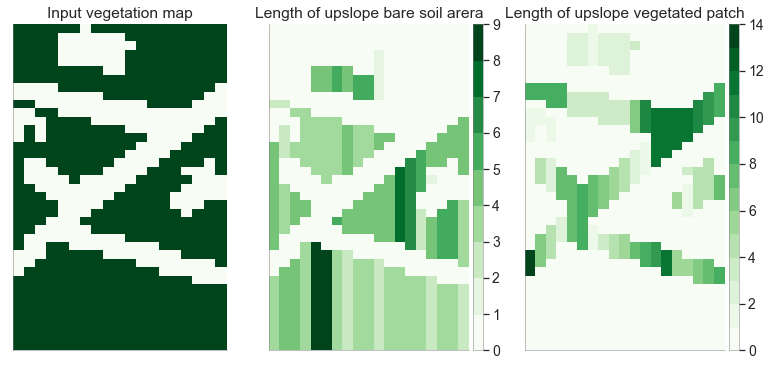

In [128]:
# Example feature maps
plt.figure(figsize = (13,6), )
plt.subplots_adjust(wspace = 0.2)

ax = plt.subplot(131)
colormap(sim, pattern_dict['isvegc'], ax, cmap = 'Greens', colorbar=False)
ax.set_title('Input vegetation map')


ax = plt.subplot(132)
colormap(sim, pattern_dict['patchLB'], ax, cfontsize=14, cmap = "Greens")
ax.set_title('Length of upslope bare soil arera')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax)

ax = plt.subplot(133)
colormap(sim, pattern_dict['bareLV'], ax, cfontsize=14, cmap = "Greens")
ax.set_title('Length of upslope vegetated patch')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax)

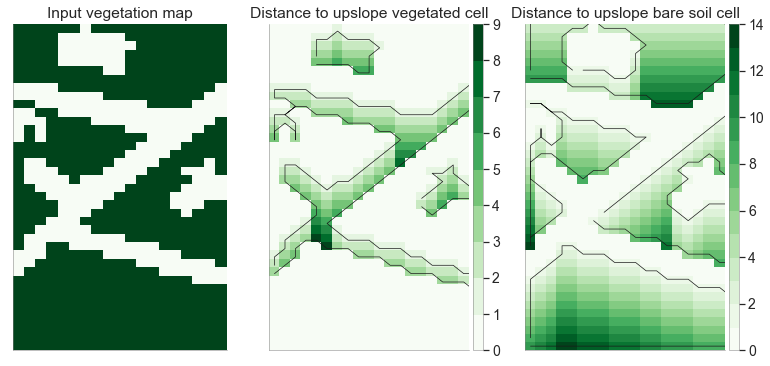

In [129]:
# More example feature maps
plt.figure(figsize = (13,6), )
plt.subplots_adjust(wspace = 0.2)
ax = plt.subplot(131)
colormap(sim, pattern_dict['isvegc'], ax, cmap = 'Greens', colorbar=False)
ax.set_title('Input vegetation map')

ax = plt.subplot(132)
colormap(sim, pattern_dict['d2uV'], ax, cfontsize=14,colorbar = True, cmap = "Greens")
ax.set_title('Distance to upslope vegetated cell')
plot_c_inv(sim.isvegc, dx = sim.dx, ax = ax)

ax = plt.subplot(133)
colormap(sim, pattern_dict['d2uB'], ax, cfontsize=14,colorbar = True,cmap = "Greens")
ax.set_title('Distance to upslope bare soil cell')
plot_c(sim.isvegc, dx = sim.dx, ax = ax)


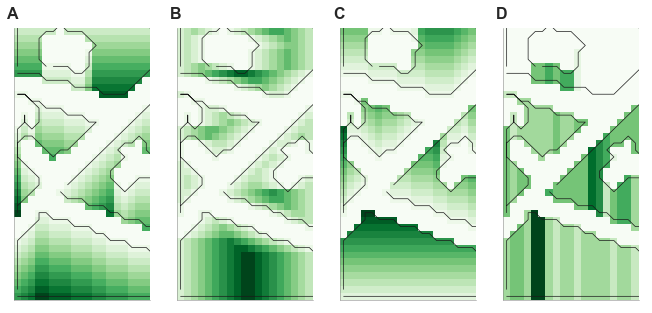

In [130]:
# Core feature examples from left to right: 
# 
fig = plt.figure(figsize= (11.2,5.))
plt.subplots_adjust(wspace = 0.2)

ax1 = plt.subplot(141)
colormap(sim,  pattern_dict['d2uB'], ax = ax1,   colorbar = False, cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(142)
colormap(sim,  pattern_dict['d2xB'], ax = ax1,   colorbar = False, cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(143)
cplot = colormap(sim,  pattern_dict['d2dB'], ax = ax1,   colorbar = False,cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)


ax1 = plt.subplot(144)
cplot = colormap(sim,  pattern_dict['patchLB'], ax = ax1,  colorbar = False,cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = plt.subplot(1,4,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')


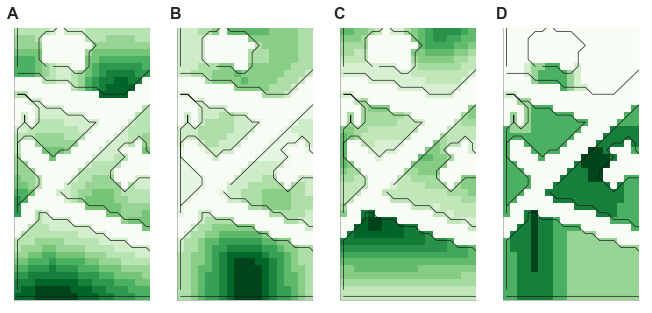

In [131]:
## Illustrating the effects of feature smoothing
fig = plt.figure(figsize= (11.2,5.))
plt.subplots_adjust(wspace = 0.2)

ax1 = plt.subplot(141)
colormap(sim,  pattern_dict['d2uB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(142)
colormap(sim,  pattern_dict['d2xB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(143)
cplot = colormap(sim,  pattern_dict['d2dB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)


ax1 = plt.subplot(144)
cplot = colormap(sim,  pattern_dict['patchLB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = plt.subplot(1,4,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')
